
# Project: Investigate a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

Database TMDb has a lot informations about 10,000 movies around the world and its cast, revenue ,production_companies, director and popularity, in this presentation we will answer some questions regarding this data such as who is the most popular cast, most revenue and some correlations between variables. Lets explore this dataset.


### Question(s) for Analysis
Question 1 (Most released genres over years? )

Question 2 (Highest and lowest Movie profit)

Question 3 (Highest and lowest Movie genres profit)

Question 4 (Exploring runtime of the movies; the average runtime and percentage above and below this average)

Question 5 (What about profits and its correlation with runtime of movies, Is it a strong correlation ? , let's explore.)



In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

In this section I will explore our dataset and try to fix every error might cause a problem in our investigation

### General Properties


At the beginning we will Read the dataset

In [3]:
# Load your data and print out a few lines. 

df = pd.read_csv('tmdb-movies.csv')


Trying to discover dataset content by Showing the first 5 rows

In [4]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Showing our dataset in numerical way

In [5]:
#explore Data Shape
df.shape

(10866, 21)

our Dataset consists of 10866 rows and 21 columns.


### Data Cleaning
#### We need to discover errors and fix it before starting our investigation to make sure that our results are accurate and clear:

1- some columns will be usless so we can drop those columns.

2- some numerical columns have a zero value which makes our data confused about the minimum, average and max values for these column, So we can chnage it to NAN

3- Some values are missing for more than one column, So we must fix this by using average for numerical columns and drop the missing values for strings, After all the remaing count of values must be the same for all columns.

4- for release_date; it must converted to date format to can be readable.

5- for two columns ( budget and revenue ) must be integer values to can be useful in extracting numeric values we need for our investigation



In [6]:
# Let's drop usless columns.

df.drop(['id', 'imdb_id','tagline','budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview' , 'vote_count', 'vote_average'], axis = 1, inplace = True)

df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015


In [7]:
#Now we must know the new shape of our data after dropping useless columns
df.shape

(10866, 11)

Dataset new shape consists of 10866 rows and 11 columns.

In [8]:
#Now let's show up some statistical data like percentile, mean and std of the numerical values of the dataset to give us some notes about the maximum, minimum and mean values.
df.describe()

,popularity,budget,revenue,runtime,release_year
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,2001.322658
std,1.000185,3.091321e+07,1.170035e+08,31.381405,12.812941
min,0.000065,0.000000e+00,0.000000e+00,0.000000,1960.000000
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,1995.000000
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,2006.000000
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,2015.000000


It's clear from these numerical numbers that there are some ZEROs values that causes inaccuracy for the results, we must fix that by replacing every Zero value by NAN for budget and revenue columns.

In [9]:
#Let's Start with Budget column
df['budget'] = df['budget'].replace(0, np.NAN)

In [10]:
#Now Revenue column
df['revenue'] = df['revenue'].replace(0, np.NAN)

Now let's show the numerical values again

In [11]:
df.describe()

,popularity,budget,revenue,runtime,release_year
count,10866.000000,5.170000e+03,4.850000e+03,10866.000000,10866.000000
mean,0.646441,3.073943e+07,8.922066e+07,102.070863,2001.322658
std,1.000185,3.890065e+07,1.620684e+08,31.381405,12.812941
min,0.000065,1.000000e+00,2.000000e+00,0.000000,1960.000000
25%,0.207583,6.000000e+06,7.708081e+06,90.000000,1995.000000
50%,0.383856,1.700000e+07,3.182654e+07,99.000000,2006.000000
75%,0.713817,4.000000e+07,9.991823e+07,111.000000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,2015.000000


In [12]:
#Now we have to show the number of Nan values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
popularity              10866 non-null float64
budget                  5170 non-null float64
revenue                 4850 non-null float64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
release_year            10866 non-null int64
dtypes: float64(3), int64(2), object(6)
memory usage: 933.9+ KB


we should dropp every Nan values to can get the same numbers of values in each column.

In [13]:
df[df.revenue.isnull()]
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3806 entries, 0 to 10848
Data columns (total 11 columns):
popularity              3806 non-null float64
budget                  3806 non-null float64
revenue                 3806 non-null float64
original_title          3806 non-null object
cast                    3806 non-null object
director                3806 non-null object
runtime                 3806 non-null int64
genres                  3806 non-null object
production_companies    3806 non-null object
release_date            3806 non-null object
release_year            3806 non-null int64
dtypes: float64(3), int64(2), object(6)
memory usage: 356.8+ KB


In [14]:
#Now we should present every column values type to make sure they are aligned with the investigation we want to do.
df.dtypes

popularity              float64
budget                  float64
revenue                 float64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
release_year              int64
dtype: object

#### some columns need to change the type of its values:
1-we should convert values of release date to be datetime type to can be readable.

2-we should convert each of Revenue and budget to integer type.

In [15]:
#let's start with converting release date column
df.release_date = pd.to_datetime(df['release_date'])

In [16]:
#now Revenue column turn
df['revenue'] = df['revenue'].apply(int)

In [17]:
#Finally Budget column
df['budget'] = df['budget'].apply(int)

In [18]:
df.dtypes

popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
release_year                     int64
dtype: object

Now we are sure that data types are ready to be investigated.

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Most released genres over years? )

Text(0,0.5,'Genres')

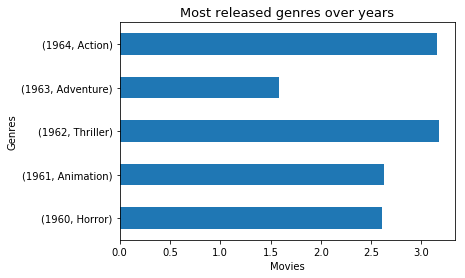

In [19]:
#to answer this question we should make a function to split the string and return the count of each genre by groupby
# split the genres string
df.genres = df.genres.str.split('|')
# using explode to creat row of each genre
df = df.explode('genres')
# making groupby between (release_year and geners) with popularity to can make a correlation between them
df.groupby(['release_year','genres'])['popularity'].mean().groupby(level='release_year').nlargest(1)
# reset data index to make more clear and getting rid of extra rows
data = df.groupby(['release_year','genres'])['popularity'].mean().groupby(level='release_year').nlargest(1).reset_index(level=0, drop=True)
# abbreviate the data by only using the first 10 row
data = data.head()
data.plot(kind= 'barh')
plt.title("Most released genres over years",fontsize=13)
plt.xlabel('Movies',fontsize=10)
plt.ylabel("Genres",fontsize= 10)


### this graph shows that for year 1964, Action movies were the most genres released and for 1963, Adventure movies were the most released genre.



### Research Question 2 (Highest and lowest Movie profit)

In [20]:
## to answer this question we must create a new column (profit)
df.insert(2,'profit',df['revenue']-df['budget'])
df.head()

,popularity,budget,profit,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
0,32.985763,150000000,1363528810,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015
0,32.985763,150000000,1363528810,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015
0,32.985763,150000000,1363528810,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015
0,32.985763,150000000,1363528810,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015
1,28.419936,150000000,228436354,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015


In [21]:
#to know the title of the movies with the max an mini profit, we should create a groupby to get the movies titles of profits
df.groupby('original_title').profit.max()

original_title
(500) Days of Summer           53222734
10 Things I Hate About You     37478166
10,000 BC                     161000000
101 Dalmatians                266689294
102 Dalmatians                 98611771
                                ...    
xXx: State of the Union       -15926068
Ã†on Flux                      -9695999
Ð¡Ñ‚Ð°Ð»Ð¸Ð½Ð³Ñ€Ð°Ð´           38129518
ÐÐ´Ð¼Ð¸Ñ€Ð°Ð»ÑŠ                36135878
ã‚¢ãƒƒãƒ—ãƒ«ã‚·ãƒ¼ãƒ‰          -8538011
Name: profit, Length: 3760, dtype: int64

Text(0,0.5,'profit')

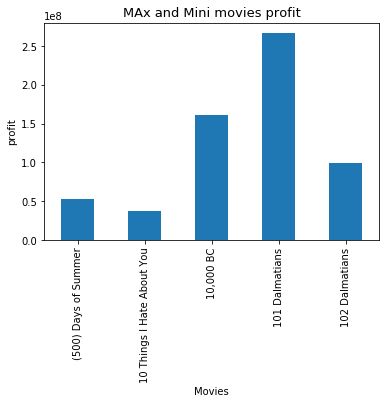

In [22]:
#now let's visualize the relation between profits and movies titles
data = df.groupby('original_title').profit.max()
data = data.head()
#bar chart is the proper kind of charts to visualize this correlation
data.plot(kind= 'bar')
plt.title("MAx and Mini movies profit",fontsize=13)
plt.xlabel('Movies',fontsize=10)
plt.ylabel("profit",fontsize= 10)

### this graph shows that the max profit belongs to movie ( 101 Dalmatians) and the mini profit is for movie (10 things I hate about you )


### Research Question 3 (Highest and lowest Movie genres profit)

Text(0,0.5,'profit')

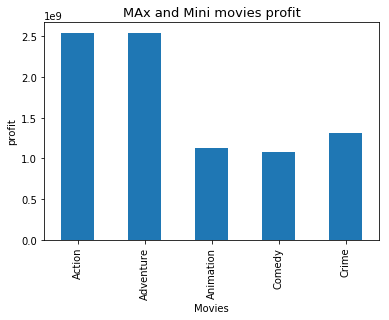

In [23]:
#to know the genres of the movies with the max an mini profit, we should create a groupby to get the movies genres of profits
data = df.groupby('genres').profit.max()
data = data.head()
#visualizing this correlation
data.plot(kind= 'bar')
plt.title("MAx and Mini movies profit",fontsize=13)
plt.xlabel('Movies',fontsize=10)
plt.ylabel("profit",fontsize= 10)

### this graph shows that the max profit belongs to Action and Adventure movies and the mini profit is for comedy and animation movies 

### Research Question 4 (Exploring runtime of the movies; the average runtime and percentage above and below this average)

In [24]:
#creating function to calculate the average of any column
def average_fun(column):
    return df[column].mean()

In [25]:
#calling average function for runtime column
average_fun ('runtime')

109.6680412371134

All our movies in this dataset has an average runtime 109 minutes.

### Let's try to know more specific details about runtime of movies above and below this average by visualizing this numerical values

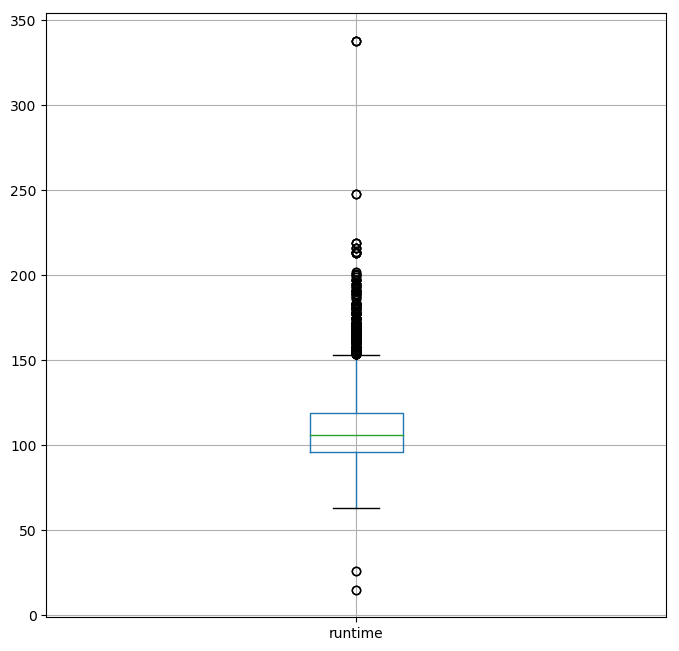

In [26]:

#this box plot of the runtime of the movies can show the mean, mode and the  
plt.figure(figsize=(8,8), dpi = 100)
boxplot = df.boxplot(column=['runtime'])

plt.show()


In [27]:
df['runtime'].describe()


count    10185.000000
mean       109.668041
std         20.232701
min         15.000000
25%         96.000000
50%        106.000000
75%        119.000000
max        338.000000
Name: runtime, dtype: float64

### from the box plot with the above numerical values we can infer that the mean ( average ) of runtime is can not be a acuurate for the most rutime of all movies as :

#### 75 % of movies have runtime  less than 119 minutes
#### 50 %  of movies have runtime less than 109 minutes

### Research Question 5 (What about profits and its correlation with runtime of movies, Is it a strong correlation ? , let's explore.

Text(0,0.5,'Profits')

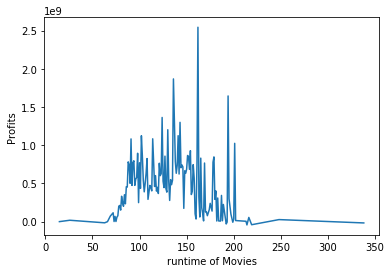

In [28]:
#best investigation to find out this correlation is to visualise it
profits_runtime = df.groupby('runtime').profit.max()
plt.plot(profits_runtime)
plt.xlabel('runtime of Movies')
plt.ylabel('Profits')

### it's very obvious that NOT the more runtime of the movie increases the more it gets profits and not the extremley short runtime movies got good profit as well, the maximum profits are limited in range ( 100 : 150 ) minutes. 

### Research Question 6 (changing in profit values through release years of movies)

In [29]:
#to answer this question we must sum the values of profits for each release year to can sketch the correlation between them.
#lets make a new groupby between the sum of profits and release year
profits_year = df.groupby('release_year')['profit'].sum()

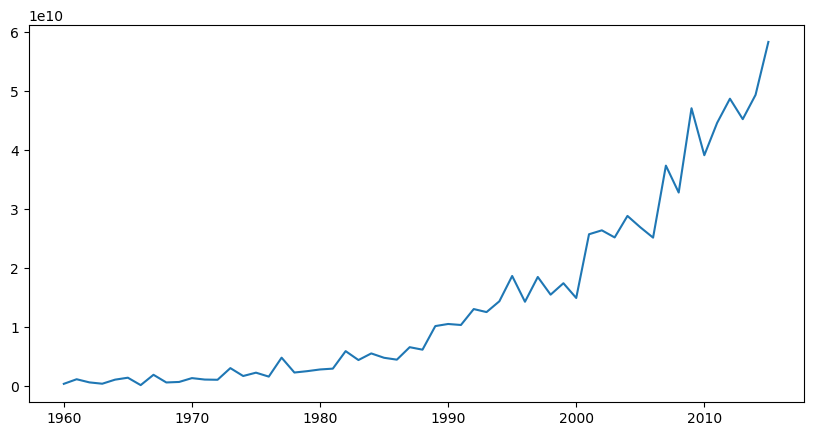

In [30]:
#now let's visualize the correlation
plt.figure(figsize=(10,5), dpi = 100)
plt.plot(profits_year)

In [31]:
# creating a function to get the max value in our data of any column
def max_fun(column):
    return df[column].max()

In [32]:
#calling the max function for the profit column
max_fun ('profit')

2544505847

In [33]:
#show up wich year this max profit has been gained
profits_year.idxmax()

2015

### from the numerical values and the graph we can Concludes that the max profit has been gained in 2015 and over the previous years the profits has been lower

<a id='conclusions'></a>
# Conclusions

In the first section I examined the most genres of movies has been released over the decades, After that the main engine for me was the profit, I investigated the movies with the max and minimum profit after that I made my analyzation for the genres with the max and minimum profit.

Finally, I analyzed the runtime of the movies and it's corelation with profits.





# Limitations
in the first section and before starting analyzing the data, I made some repair modifications on some columns such budget_adj, revenue and release date, Maybe that will distort results from my investigation.
All correlations I did and visualise in this investigation, Maybe there are another factors behind this values not only this two variables but no doubt they have impact about each other like we shown up in the graphs above


In [34]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0